In [22]:
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [23]:
import pandas as pd
import numpy as np

In [24]:
train_data = pd.read_csv("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\data\\train.csv");
test_data = pd.read_csv("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\data\\test.csv");
train_len = int(len(train_data))
print(train_len)

2000


In [25]:
#split train data into train and validation data
split_ratio = 0.8

train_size = int( train_len * (split_ratio))

#before taking partitions shuffle rows
#this is because all same class tuples are grouped together
train_data = train_data.sample(frac=1).reset_index(drop=False)

X_train = np.array(train_data['sequence'][0:])
Y_train = np.array(train_data['label'][0:])
X_test = np.array(train_data['sequence'][train_size:])
Y_test = np.array(train_data['label'][train_size:])


In [26]:
#preprocessing of DNA sequences
from keras.preprocessing.text import Tokenizer
from keras import optimizers

tokenizer = Tokenizer(split='', char_level=True)
tokenizer.fit_on_texts(X_train)

print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

encoded_X_train = tokenizer.texts_to_sequences(X_train) #mode for text_to_matrix = freq,count,binary,tfidf
print(encoded_X_train[0])

OrderedDict([('T', 5713), ('G', 9361), ('A', 6022), ('C', 6904)])
2000
{'G': 1, 'C': 2, 'A': 3, 'T': 4}
{'T': 1710, 'C': 1899, 'A': 1787, 'G': 1905}
[4, 4, 1, 3, 3, 2, 2, 4, 4, 3, 2, 4, 3, 3]


In [36]:
#LSTM model in keras
def model_init(input_length):
    LSTM_model = Sequential()
    print(input_length)
    LSTM_model.add(Embedding(5,100, input_length = 14))
    
    LSTM_model.add(LSTM(activation="sigmoid", return_sequences=True, units=256))
    LSTM_model.add(LSTM(activation="sigmoid", units=256))
    LSTM_model.add(Dense(1, activation='sigmoid'))

    LSTM_model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return LSTM_model

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

(2000,)
(2000,)
(400,)
(400,)


In [38]:
model = model_init(train_len)

trained_model = model.fit(np.array(encoded_X_train), np.array(Y_train), batch_size=10, epochs=15, validation_split = 0.2, verbose = 1)


2000
Train on 1600 samples, validate on 400 samples
Epoch 1/15
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6076 - acc: 0.6763 - val_loss: 0.2700 - val_acc: 0.9025
Epoch 2/15
1600/1600 [==============================] - 14s 8ms/step - loss: 0.3737 - acc: 0.8437 - val_loss: 0.3223 - val_acc: 0.8525
Epoch 3/15
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3582 - acc: 0.8444 - val_loss: 0.2797 - val_acc: 0.8925
Epoch 4/15
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3506 - acc: 0.8500 - val_loss: 0.2652 - val_acc: 0.8950
Epoch 5/15
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3439 - acc: 0.8481 - val_loss: 0.2636 - val_acc: 0.8975
Epoch 6/15
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3440 - acc: 0.8419 - val_loss: 0.2829 - val_acc: 0.8900
Epoch 7/15
1600/1600 [==============================] - 14s 9ms/step - loss: 0.3399 - acc: 0.8531 - val_loss: 0.2789 - val_acc: 0.8950
Ep

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


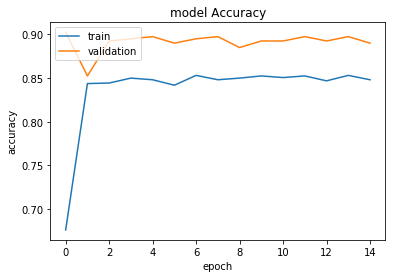

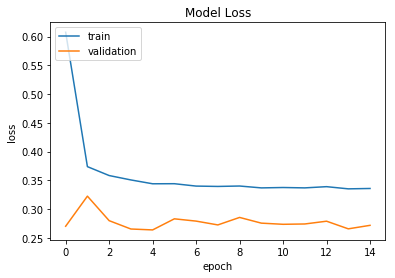

In [39]:
import matplotlib.pyplot as plt
print(trained_model.history.keys())
# summarize history for accuracy
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
encoded_X_test = tokenizer.texts_to_sequences(X_test)
score, accuracy = model.evaluate(np.array(encoded_X_test), np.array(Y_test), batch_size=1)
print('Score:', score)
print('Accuracy:', accuracy)

400/400 [==============================] - 2s 6ms/step
Score: 0.27154289109632374
Accuracy: 0.89


In [32]:
from keras.models import model_from_json

model_JSON = model.to_json()
with open("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\models\\model_JSON.json","w") as json_file:
    json_file.write(model_JSON)
model.save_weights("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\models\\model_WEIGHTS.h5")
model.save("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\models\\model_model.h5")

In [34]:
sub_X_test =  np.array(test_data['sequence'][0:])
encoded_sub_X_test = tokenizer.texts_to_sequences(sub_X_test)
#preds = model.predict(np.array(encoded_sub_X_test))
#print(preds[:10])
preds = model.predict_classes(np.array(encoded_sub_X_test))

sub_df = pd.DataFrame(data=preds,columns={"prediction"})
sub_df.to_csv(path_or_buf="C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\results\\sub90.csv", columns={"prediction"}, header=True, index=True, index_label="id")
print("submission file ready!")

submission file ready!


In [35]:
#load saved model and predict
# load json and create model
json_file = open("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\models\\model_JSON.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("C:\\Users\\konya\\Desktop\\DNA_TFBP\\DNA_TranscriptionFactorBindingPrediction\\models\\model_WEIGHTS.h5")
print("Loaded model from disk")

#predict using loaded model
preds_loaded = loaded_model.predict_classes(np.array(encoded_sub_X_test))
print(preds_loaded[:10])


Loaded model from disk
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
